
Hay una diferencia con respecto al libro: en lugar de primero descargar el fichero y luego tratarlo, se descarga directamente utilizando la librería requests

AUS 55614285.86237703
BEL 38023212.48280704
FIN 22459413.326955706
FRA 14965217.709279053
GRC 12325672.610691836
NZL 3641701.532396013
NZL 3641701.532396013


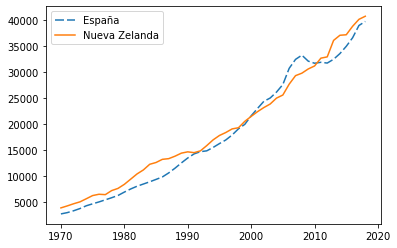

In [19]:
import requests
import pandas as pd
import io

# fuente: https://data.oecd.org/gdp/gross-domestic-product-gdp.htm
url = 'https://stats.oecd.org/sdmx-json/data/DP_LIVE/.GDP.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en'
urlData = requests.get(url).content
ds = pd.read_csv(io.StringIO(urlData.decode('utf-8')),sep=',')
paises = ds.LOCATION.unique()
esp = ds.loc[(ds['LOCATION'] == 'ESP') &
             (ds['MEASURE'] == 'USD_CAP') &
             (ds['TIME'] >=1970)].Value
esp = esp.reset_index(drop=True)

# Inicialmente declaramos una variable paisM, que será la que tendrá el nombre del país cuya renta difiere menos de la española de media. El valor None indica que la variable aún no tiene ningún valor útil, no tenemos ningún país ‘candidato’. Para encontrar este candidato, recorremos la lista de todos los países incluidos en el conjunto de datos mediante una instrucción for. La variable pais tendrá en cada momento el nombre del país que estamos considerando.
paisM = None
for pais in paises:
    if pais!='ESP':
        otro = ds.loc[(ds['LOCATION'] == pais) & (ds['MEASURE'] == 'USD_CAP') & (ds['TIME'] >=1970)].Value
        otro = otro.reset_index(drop=True)
        if otro.size == esp.size:    	
            mse = otro.sub(esp).pow(2).mean()
            if paisM==None or mse < mejorMse:
                paisM=pais
                mejorMse=mse
                print(paisM,mejorMse)
                datosM = otro

print(paisM,mejorMse)


import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1970,1970+esp.size),esp,dashes=[6, 2], label='España')
plt.plot(range(1970,1970+datosM.size),datosM, label='Nueva Zelanda')
 
plt.legend()
plt.show()
